In [45]:
# Import des bibliothèques de manipulation et visualisation
import pandas as pd # Permet de manipuler des tableaux de données (DataFrames) et de lire des fichiers CSV ou Excel.

import numpy as np # Offre des outils mathématiques performants pour gérer les calculs sur des tableaux numériques et des matrices.

import matplotlib.pyplot as plt # Bibliothèque de base pour créer des graphiques et des visualisations statiques en 2D.

import seaborn as sns # Extension de matplotlib facilitant la création de graphiques statistiques plus esthétiques et complexes.

#Préparation des données

from sklearn.model_selection import train_test_split # Fournit une fonction pour diviser automatiquement votre jeu de données en un ensemble d'entraînement et un ensemble de test.

#Mesures de performance (Métriques)

from sklearn.metrics import accuracy_score # Importe la fonction pour calculer le taux global de bonnes réponses (exactitude).

from sklearn.metrics import recall_score # Importe la fonction pour mesurer le rappel (capacité à détecter tous les cas positifs).

from sklearn.metrics import f1_score # Importe la fonction pour calculer le score F1, l'équilibre entre précision et rappel.

from sklearn.metrics import precision_score # Importe la fonction pour mesurer la précision (fiabilité des prédictions positives).

from sklearn.metrics import balanced_accuracy_score # Importe la fonction pour calculer l'exactitude équilibrée, utile si vos classes ne sont pas de taille égale.

from sklearn.metrics import matthews_corrcoef # Importe le coefficient de Matthews, une mesure de qualité très fiable même sur des données déséquilibrées.

from sklearn.metrics import classification_report # Importe l'outil qui génère un rapport texte complet avec les principales métriques pour chaque classe.

#Algorithme de calcul (XGBoost)
from xgboost import XGBClassifier # Importe spécifiquement la classe pour créer un modèle de classification utilisant l'algorithme de Boosting de Gradient.

import xgboost as xgb # Importe l'intégralité de la bibliothèque XGBoost pour pouvoir utiliser ses fonctionnalités plus techniques et ses formats de données propres.



In [46]:
# Chargement du fichier CSV
df = pd.read_csv("transactions.csv")
print(f"Fichier chargé avec succès ! Le tableau contient {df.shape[0]} lignes et {df.shape[1]} colonnes.") # Affiche une confirmation textuelle avec les dimensions exactes du DataFrame.
print(df.head()) # Affiche les 5 premières lignes pour vérifier que les données et les colonnes sont correctement alignées.


Fichier chargé avec succès ! Le tableau contient 299695 lignes et 17 colonnes.
   transaction_id  user_id  account_age_days  total_transactions_user  \
0               1        1               141                       47   
1               2        1               141                       47   
2               3        1               141                       47   
3               4        1               141                       47   
4               5        1               141                       47   

   avg_amount_user  amount country bin_country channel merchant_category  \
0           147.93   84.75      FR          FR     web            travel   
1           147.93  107.90      FR          FR     web            travel   
2           147.93   92.36      FR          FR     app            travel   
3           147.93  112.47      FR          FR     web           fashion   
4           147.93  132.91      FR          US     web       electronics   

   promo_used  avs_match 

In [47]:
df.info()
df.head()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299695 entries, 0 to 299694
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   transaction_id           299695 non-null  int64  
 1   user_id                  299695 non-null  int64  
 2   account_age_days         299695 non-null  int64  
 3   total_transactions_user  299695 non-null  int64  
 4   avg_amount_user          299695 non-null  float64
 5   amount                   299695 non-null  float64
 6   country                  299695 non-null  object 
 7   bin_country              299695 non-null  object 
 8   channel                  299695 non-null  object 
 9   merchant_category        299695 non-null  object 
 10  promo_used               299695 non-null  int64  
 11  avs_match                299695 non-null  int64  
 12  cvv_result               299695 non-null  int64  
 13  three_ds_flag            299695 non-null  int64  
 14  tran

,transaction_id,user_id,account_age_days,total_transactions_user,avg_amount_user,amount,country,bin_country,channel,merchant_category,promo_used,avs_match,cvv_result,three_ds_flag,transaction_time,shipping_distance_km,is_fraud
299690,299691,6000,996,45,27.93,34.07,ES,ES,web,grocery,0,1,1,0,2024-09-29T04:40:54Z,218.55,0
299691,299692,6000,996,45,27.93,68.56,ES,ES,app,travel,0,1,1,1,2024-10-03T08:49:02Z,185.55,0
299692,299693,6000,996,45,27.93,25.02,ES,ES,app,fashion,0,1,1,1,2024-10-26T07:40:38Z,33.50,0
299693,299694,6000,996,45,27.93,23.92,ES,ES,web,gaming,0,0,0,0,2024-10-27T09:31:56Z,71.75,0
299694,299695,6000,996,45,27.93,26.07,ES,ES,web,gaming,1,1,1,1,2024-10-30T11:10:23Z,355.83,0


## Résumé structurel du dataset

Le dataset contient **299 695 transactions** et **17 variables**, sans valeurs manquantes.
La structure est cohérente et directement exploitable pour une analyse exploratoire avancée et la modélisation.

---

### Dimensions
- **Nombre de lignes** : 299 695
- **Nombre de colonnes** : 17
- **Mémoire utilisée** : ~38,9 MB
- **Index** : `RangeIndex` (0 à 299 694)

---

### Répartition des types de variables
- **Variables numériques continues (`float64`)** : 3
- **Variables numériques discrètes / binaires (`int64`)** : 9
- **Variables catégorielles (`object`)** : 5

---

### Détail des colonnes par type

#### Identifiants
- **transaction_id** (`int64`) : identifiant unique de la transaction
- **user_id** (`int64`) : identifiant utilisateur

#### Variables numériques continues
- **avg_amount_user** (`float64`) : montant moyen des transactions de l’utilisateur
- **amount** (`float64`) : montant de la transaction
- **shipping_distance_km** (`float64`) : distance géographique de livraison

#### Variables numériques discrètes / binaires
- **account_age_days** (`int64`) : ancienneté du compte en jours
- **total_transactions_user** (`int64`) : nombre total de transactions utilisateur
- **promo_used** (`int64`) : utilisation d’un code promotionnel (0/1)
- **avs_match** (`int64`) : correspondance AVS (0/1)
- **cvv_result** (`int64`) : validation CVV (0/1)
- **three_ds_flag** (`int64`) : authentification 3D Secure (0/1)
- **is_fraud** (`int64`) : variable cible (0 = légitime, 1 = fraude)

#### Variables catégorielles
- **country** (`object`) : pays de l’utilisateur
- **bin_country** (`object`) : pays du BIN de la carte bancaire
- **channel** (`object`) : canal de paiement (web, app, etc.)
- **merchant_category** (`object`) : catégorie du commerçant
- **transaction_time** (`object`) : date et heure de la transaction (UTC)

---

### Qualité des données
- **Valeurs manquantes** : aucune
- **Types cohérents** avec une problématique de détection de fraude
- **Variable temporelle** à convertir en `datetime` pour extraction de features (heure, jour, cyclicité)

---

### Lecture métier initiale
Le dataset combine :
- des **signaux comportementaux utilisateur**,
- des **informations transactionnelles**,
- des **indicateurs de sécurité**,
- des **éléments géographiques et temporels**.

Il est bien adapté à une **approche de classification binaire déséquilibrée**, avec un fort potentiel de **feature engineering** et d’**interprétabilité via SHAP**.



In [48]:
df.isna().sum().sort_values(ascending=False)
df.isna().mean().sort_values(ascending=False)


transaction_id             0.0
user_id                    0.0
account_age_days           0.0
total_transactions_user    0.0
avg_amount_user            0.0
amount                     0.0
country                    0.0
bin_country                0.0
channel                    0.0
merchant_category          0.0
promo_used                 0.0
avs_match                  0.0
cvv_result                 0.0
three_ds_flag              0.0
transaction_time           0.0
shipping_distance_km       0.0
is_fraud                   0.0
dtype: float64

In [49]:
df.duplicated().sum()

np.int64(0)

Le tableau montre qu’aucune colonne du dataset ne contient de valeurs manquantes, ce qui indique des données complètes et directement exploitables pour l’analyse et la modélisation.


In [50]:
df["is_fraud"].value_counts()
df["is_fraud"].value_counts(normalize=True)

is_fraud
0    0.977938
1    0.022062
Name: proportion, dtype: float64

<Axes: xlabel='is_fraud', ylabel='count'>

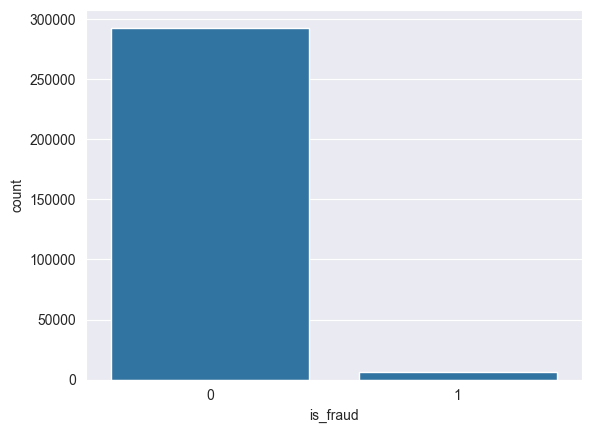

In [51]:
import seaborn as sns
sns.countplot(data=df, x="is_fraud")


La variable cible `is_fraud` est fortement déséquilibrée, avec environ 97,8 % de transactions non frauduleuses contre 2,2 % de fraudes.
Ce déséquilibre de classes nécessite l’usage de métriques adaptées (recall, F1, ROC-AUC) et de techniques spécifiques pour l’entraînement des modèles.


In [52]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

num_cols, cat_cols


(Index(['transaction_id', 'user_id', 'account_age_days',
        'total_transactions_user', 'avg_amount_user', 'amount', 'promo_used',
        'avs_match', 'cvv_result', 'three_ds_flag', 'shipping_distance_km',
        'is_fraud'],
       dtype='object'),
 Index(['country', 'bin_country', 'channel', 'merchant_category',
        'transaction_time'],
       dtype='object'))

Le dataset est composé de variables numériques et binaires (identifiants, montants, signaux de sécurité, distance, cible `is_fraud`) ainsi que de variables catégorielles et temporelles (pays, canal, catégorie marchand, temps).
Cette séparation implique des traitements distincts en preprocessing, notamment l’encodage des variables catégorielles et la transformation de la variable temporelle avant la modélisation.


In [53]:
df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
transaction_id,299695.0,149848.000000,86514.638800,1.00,74924.50,149848.00,224771.50,299695.00
user_id,299695.0,3002.559432,1732.309663,1.00,1501.00,3007.00,4504.00,6000.00
account_age_days,299695.0,973.397871,525.241409,1.00,516.00,975.00,1425.00,1890.00
total_transactions_user,299695.0,50.673321,5.976391,40.00,46.00,51.00,56.00,60.00
avg_amount_user,299695.0,148.142973,200.364624,3.52,46.19,90.13,173.45,4565.29
amount,299695.0,177.165279,306.926507,1.00,42.10,89.99,191.11,16994.74
promo_used,299695.0,0.153640,0.360603,0.00,0.00,0.00,0.00,1.00
avs_match,299695.0,0.837999,0.368453,0.00,1.00,1.00,1.00,1.00
cvv_result,299695.0,0.872110,0.333968,0.00,1.00,1.00,1.00,1.00
three_ds_flag,299695.0,0.784588,0.411109,0.00,1.00,1.00,1.00,1.00


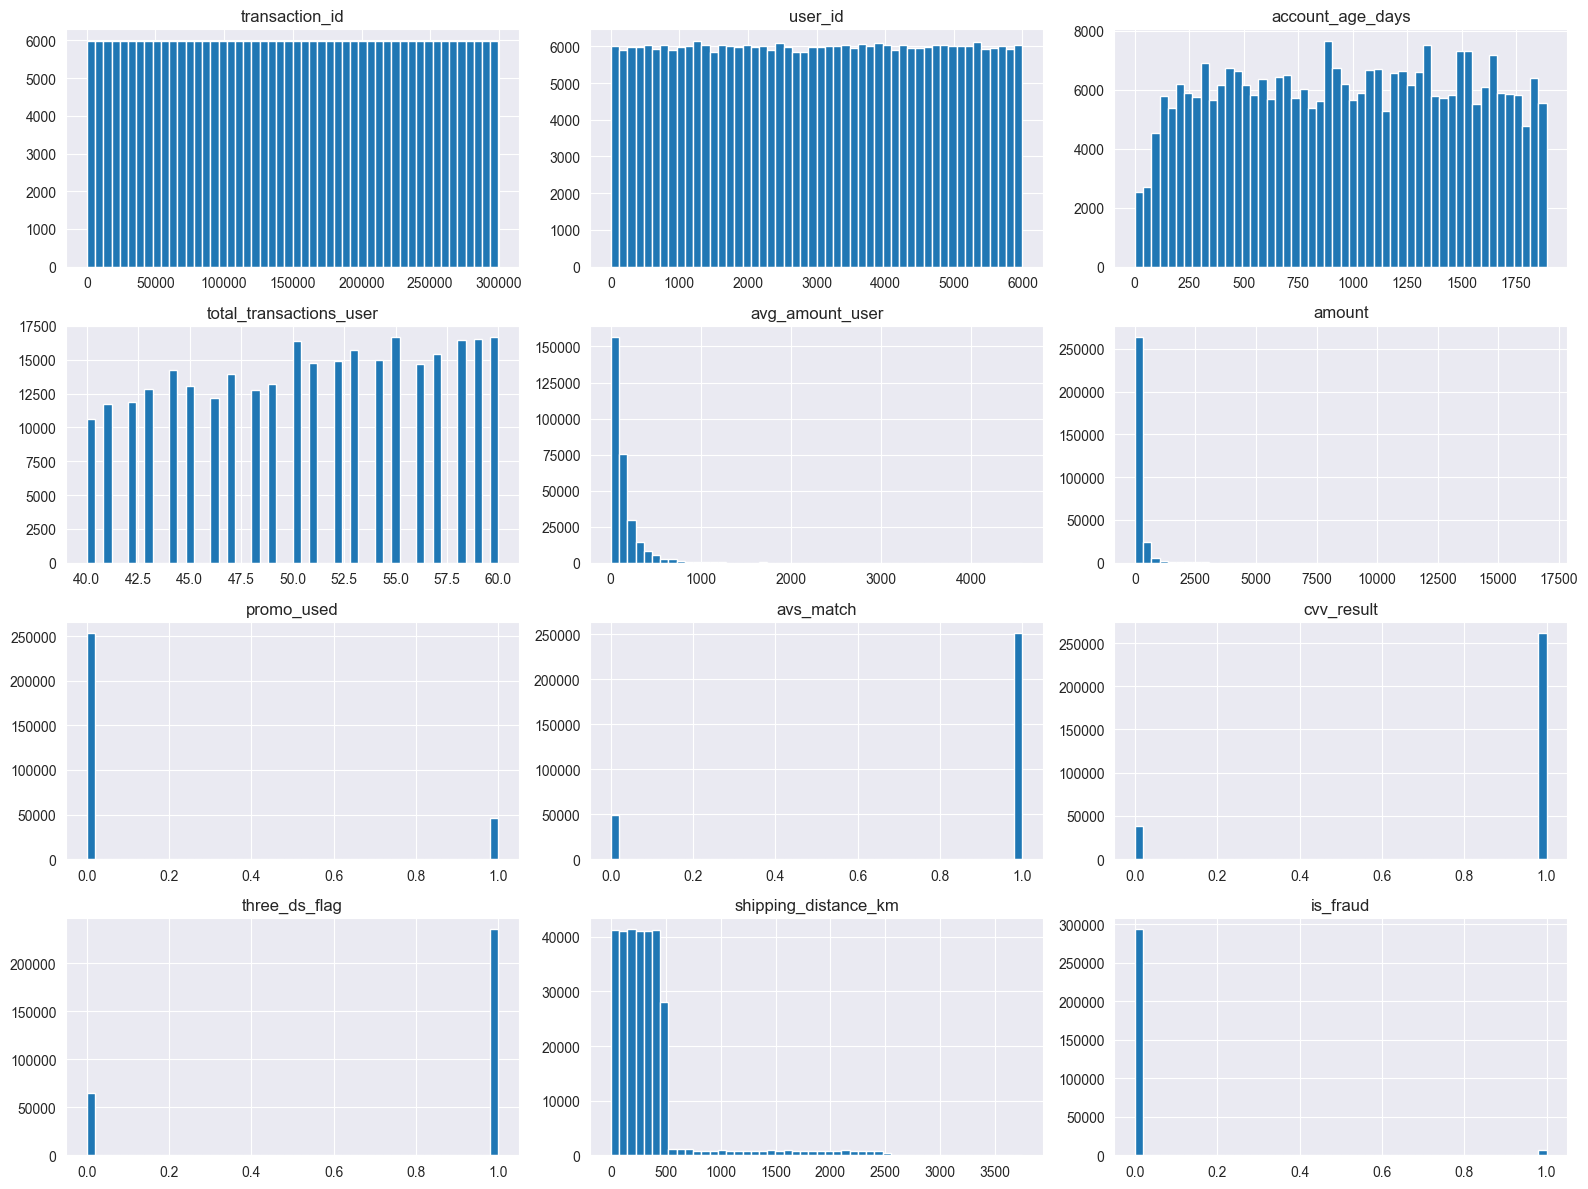

In [54]:
df[num_cols].hist(figsize=(16,12), bins=50)
plt.tight_layout()

Les distributions montrent des variables continues très asymétriques (amount, avg_amount_user, shipping_distance_km) avec des valeurs extrêmes, tandis que les variables binaires (promo_used, avs_match, cvv_result, three_ds_flag, is_fraud) sont fortement déséquilibrées.
Nécessitant normalisation, gestion des outliers et une attention particulière au déséquilibre de la cible.


<Axes: >

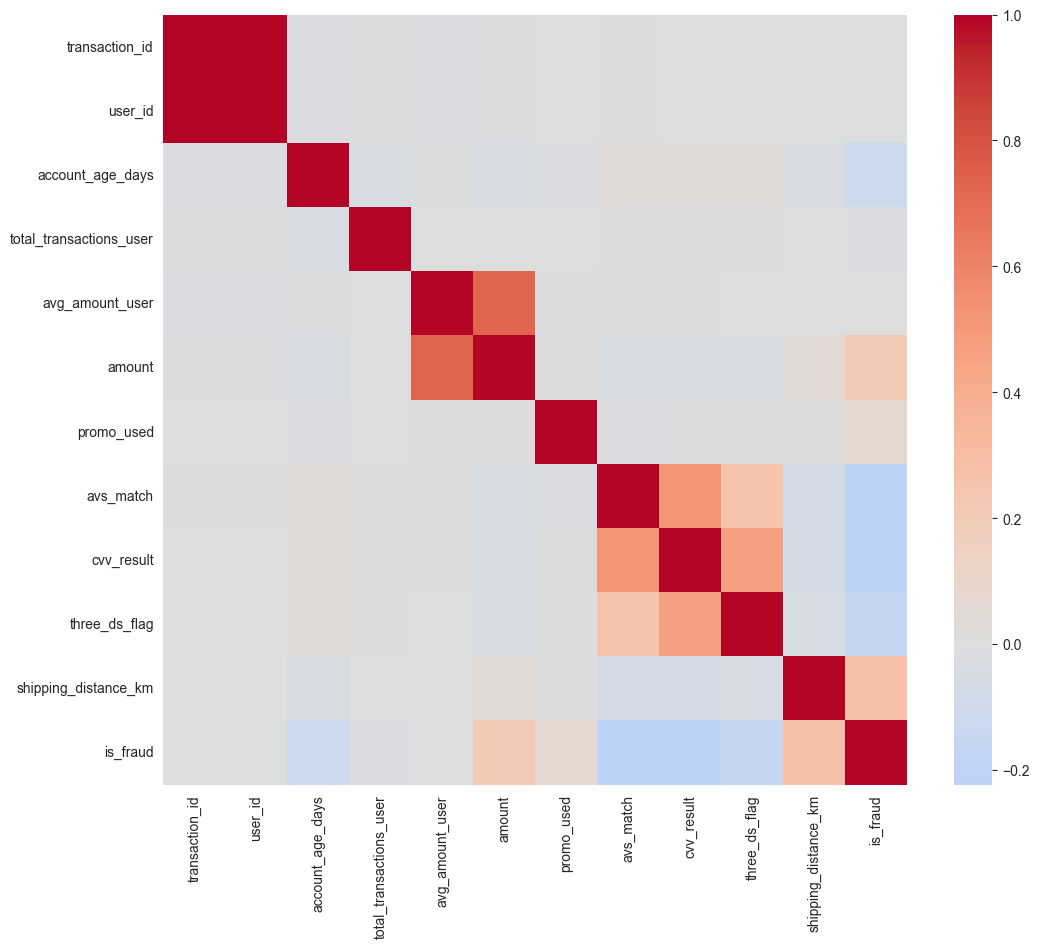

In [55]:
corr = df[num_cols].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm", center=0)


## Début du Feature Engineering

Les analyses exploratoires mettent en évidence des distributions asymétriques, des valeurs extrêmes et un fort déséquilibre de la variable cible, ce qui justifie la création de nouvelles variables plus informatives.
Le feature engineering vise ici à transformer les signaux bruts (montants, comportements utilisateurs, contrôles de sécurité, distance) en indicateurs comportementaux et contextuels mieux adaptés à la détection de fraude.


In [56]:
df["transaction_time"] = pd.to_datetime(df["transaction_time"])
# Conversion de la colonne 'transaction_time' au format datetime afin de manipuler correctement
# les informations temporelles (date et heure exactes de chaque transaction) et permettre
# l’extraction de features temporelles (heure, jour, mois, etc.)


In [57]:
df = df.sort_values(["user_id", "transaction_time"]).reset_index(drop=True)
# Trie les transactions par utilisateur et par date.

In [58]:

df["hour"] = df["transaction_time"].dt.hour #on extrait l'heure de la transaction pour repérer les périodes ou la fraude est plus fréquente #OK

df["dayofweek"] = df["transaction_time"].dt.dayofweek #on extrait le jour de la semaine pour voir si certaine journée (comme le week end) on plus de fraude #OK


df["is_night"] = ((df["hour"] >= 22) | (df["hour"] <= 5)) * 1 #ici création d'une variable qui vaudra 1 si la transaction a lieu la nuit (de 22h a 5h du matin) le test logique  donnera "True" si entre 0 et 5 sinon False et ensuite transformation du resultat en 1/0  utilisable par un modele #OK

df["avg_amount_user_past"] = (df.groupby("user_id")["amount"].expanding().mean().shift(1).reset_index(level=0, drop=True)) # calcule la somme cumulée et le nombre de transactions passées, on les divise, et on obtient la moyenne passée sans aucune donnée future.

df["amount_diff_user_avg"] = df["amount"] - df["avg_amount_user_past"]# mesure si le montant actuel est différent du montant moyen habituel de l'utilisateur # OK

df["is_new_account"] = (df["account_age_days"] < 30) * 1 #verifie si c'est un nouveau compte ou pas , test logique pour voir si il a moin de 30 jour et transformation du resultat en 1/0 #OK

df["security_mismatch_score"] = (df["avs_match"] == 0) * 1 + (df["cvv_result"] == 0) * 1 # ici ca calcule un score de risque en comptant combien de vérification on échoué (avs ou cvv) un total de 0,1,2 #OK
#________________________________________________________________________________________________________________________________________
df["user_fraud_count"] = (df.groupby("user_id")["is_fraud"].cumsum().shift(1).fillna(0)) #calcul combien de fraudes un utilisateur a deja fait au total #ok

df["user_has_fraud_history"] = (df["user_fraud_count"] > 0) * 1 # montre si l'utilisateur a deja fraudé au moin 1 fios 0/1

df["user_tx_count"] = df.groupby("user_id").cumcount() #combien de transaction l'utilisateur avait avant celle ci (compteur historique)

df["user_fraud_rate"] = (df["user_fraud_count"] / df["user_tx_count"]).fillna(0) #nombre de fraude déjà commises avant celle ci
df["user_fraud_rate"] = df["user_fraud_rate"].replace([np.inf, -np.inf], 0)


#_________________________________________________________________________________________________________________________________________

df["country_bin_mismatch"] = (df["country"] != df["bin_country"]) * 1 #verifie que le pays de la carte (le bin) ne correspond pas au pays de la transaction 0/1

df["distance_amount_ratio"] = df["shipping_distance_km"] / (df["amount"] + 1) #mesure si la distance dexpedition est plus importante que le montant de la transaction

df["amount_delta_prev"] = df.groupby("user_id")["amount"].diff().fillna(0) #mesure la différence entre le montant actuel et le montant de la transaction précédente du meme utilisateur pour reperer les changement de comportement
#__________________________________________________________________________________________________________________________________________
df["channel_changed"] = (df["channel"] != df.groupby("user_id")["channel"].shift()).astype(int)# vaux 1 si le canal de transaction change #BINAIRE NECESSAIRE

#__________________________________________________________________________________________________________________________________________
df["time_since_last"] = df.groupby("user_id")["transaction_time"].diff().dt.total_seconds() #mesure le nombre de secondes entre la transaction actuelle et la derniere

df["transaction_count_cum"] = df.groupby("user_id").cumcount() + 1
#________________________________________________________________________________________________________________________________


In [59]:
# Tri (Toujours nécessaire)
df = df.sort_values(["user_id", "transaction_time"])

#  Fonction corrigée sans shift, avec closed='left'
def get_rolling_count_safe(g, window):
    # closed='left' signifie : regarde du passé jusqu'à maintenant,
    # mais EXCLUT la transaction actuelle du compte.
    return pd.Series(
        g.set_index("transaction_time")["amount"]
         .rolling(window, closed='left')
         .count()
         .values,
        index=g.index
    )

#  Application
# On sélectionne les colonnes avant le apply pour éviter les warnings/erreurs
cols_needed = ["transaction_time", "amount"]

df["tx_last_24h"] = df.groupby("user_id", group_keys=False)[cols_needed].apply(
    lambda g: get_rolling_count_safe(g, "24h")
)

df["tx_last_7d"] = df.groupby("user_id", group_keys=False)[cols_needed].apply(
    lambda g: get_rolling_count_safe(g, "7d")
)

df["tx_last_30d"] = df.groupby("user_id", group_keys=False)[cols_needed].apply(
    lambda g: get_rolling_count_safe(g, "30d")
)

# Remplacer les NaN (premières lignes) par 0
df[["tx_last_24h", "tx_last_7d", "tx_last_30d"]] = df[["tx_last_24h", "tx_last_7d", "tx_last_30d"]].fillna(0)

In [60]:
df = df.drop(columns=["transaction_time"]) #Suppression de la colonne transaction time
df.drop(columns=["transaction_id"], inplace=True)
df = pd.get_dummies(
    df, columns=["country", "bin_country", "channel", "merchant_category",],
    drop_first=False
)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, balanced_accuracy_score, matthews_corrcoef, confusion_matrix, classification_report
# Target
y = df["is_fraud"]

# Features (tout sauf la target)
X = df.drop(columns=["is_fraud"])


In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [63]:
# Calcul poids de classe
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

model = xgb.XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=4,
    min_child_weight=12,   # limite les feuilles trop petites → moins d’overfit
    gamma=3,               # empêche les splits inutiles → régularisation
    subsample=0.7,         # chaque arbre voit moins d’échantillons → généralisation
    colsample_bytree=0.7,  # chaque arbre voit moins de features → moins d’overfit
    objective="binary:logistic",
    eval_metric="logloss",
    scale_pos_weight=12,
    random_state=42,
    n_jobs=-1
)




In [64]:
df["time_since_last"] = df["time_since_last"].fillna(0)

In [65]:
# 1. Train
model.fit(X_train, y_train)

# 2. Predict
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

# 3. Metrics
print("===== TRAIN RESULTS =====")
print("Accuracy :", accuracy_score(y_train, y_train_pred))
print("Recall   :", recall_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("F1-score :", f1_score(y_train, y_train_pred))

print("\n===== TEST RESULTS =====")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("F1-score :", f1_score(y_test, y_test_pred))


===== TRAIN RESULTS =====
Accuracy : 0.9866864645723152
Recall   : 0.8930056710775047
Precision: 0.6427210884353741
F1-score : 0.7474683544303797

===== TEST RESULTS =====
Accuracy : 0.985501926959075
Recall   : 0.8638426626323752
Precision: 0.6237028945931186
F1-score : 0.7243894703457026


### Analyse des résultats du modèle

Le modèle présente des performances élevées sur le jeu d’entraînement avec un recall fort, indiquant une bonne capacité à détecter les fraudes au prix d’une précision plus modérée.
Sur le jeu de test, les métriques diminuent légèrement mais restent proches de celles du train, ce qui montre une bonne généralisation du modèle.
L’équilibre obtenu entre recall et F1-score est cohérent avec les objectifs métiers de la détection de fraude.


,feature,importance
6,avs_match,1681.428711
1,account_age_days,1237.785889
16,security_mismatch_score,1097.297729
9,shipping_distance_km,808.354004
20,user_fraud_rate,613.627319
17,user_fraud_count,561.941711
18,user_has_fraud_history,417.619415
4,amount,414.171387
8,three_ds_flag,403.265900
14,amount_diff_user_avg,380.478973


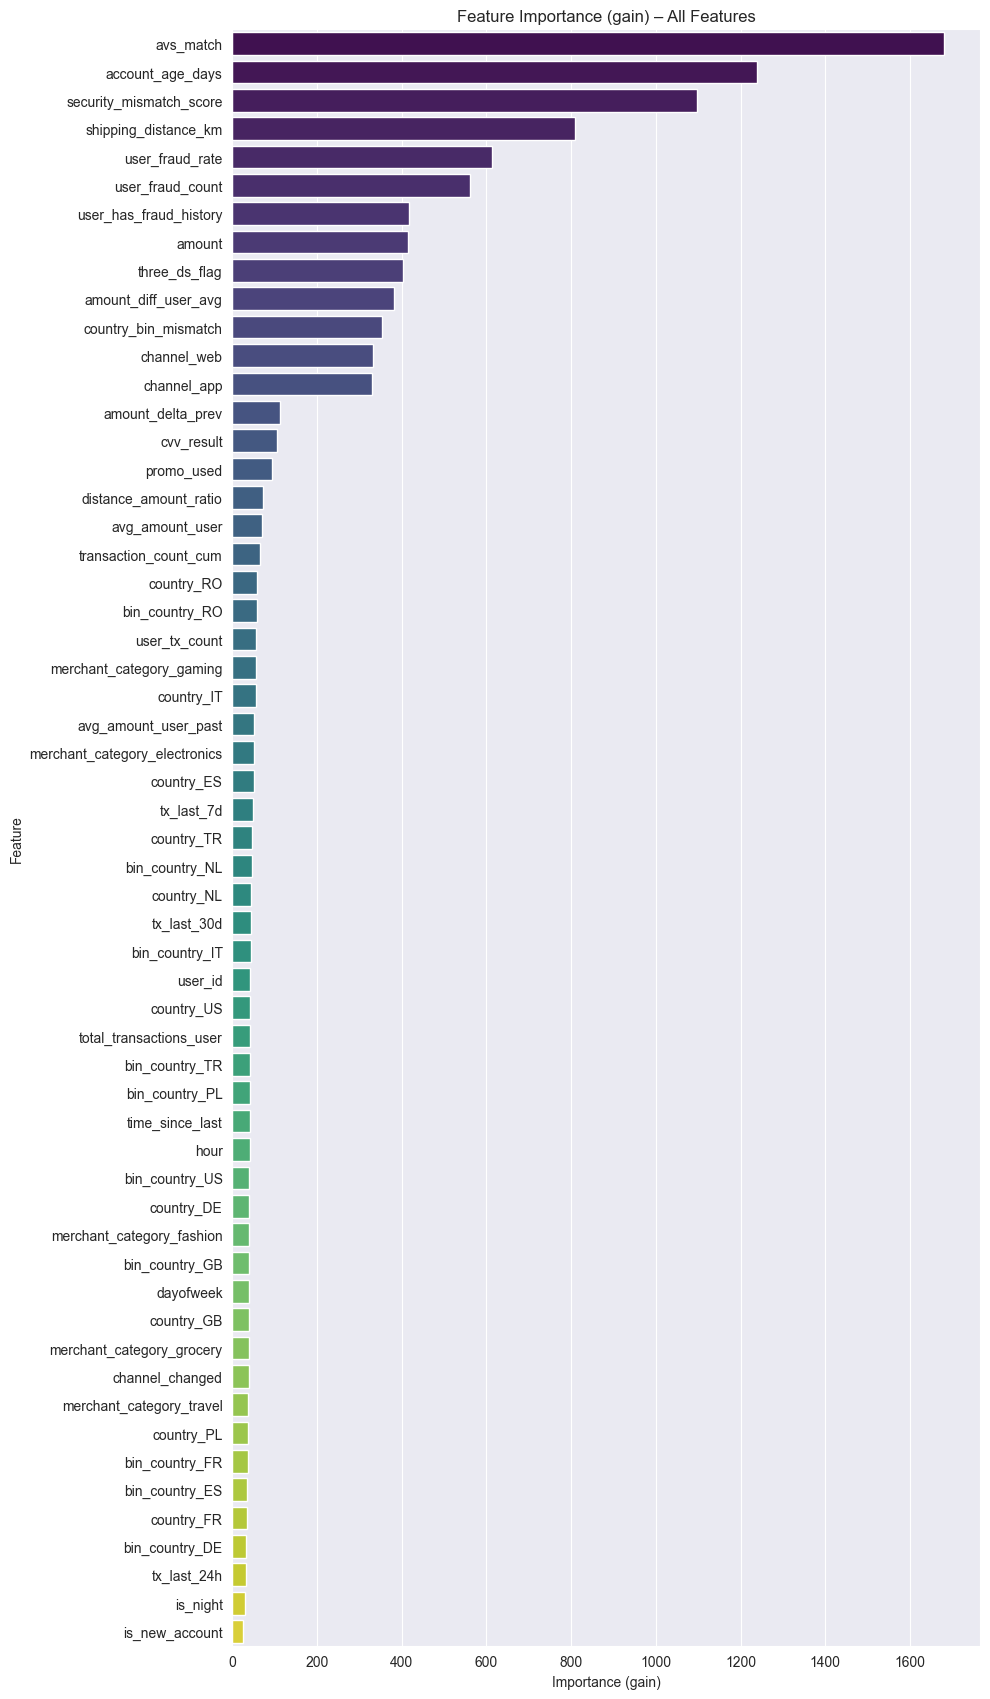

In [66]:
# Récupération des importances XGBoost
importance = model.get_booster().get_score(importance_type='gain')

#  DataFrame trié
importance_df = pd.DataFrame(
    importance.items(),
    columns=["feature", "importance"]
).sort_values("importance", ascending=False)

#  Affichage du tableau complet
display(importance_df)

#  Plot propre sans warning
plt.figure(figsize=(10, len(importance_df) * 0.3))  # hauteur auto-adaptée
sns.barplot(
    data=importance_df,
    x="importance",
    y="feature",
    hue="feature",        # pour éviter le warning
    dodge=False,
    legend=False,
    palette="viridis"
)
plt.title("Feature Importance (gain) – All Features")
plt.xlabel("Importance (gain)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

L’importance des features montre que les signaux de sécurité (`avs_match`, `security_mismatch_score`) et l’ancienneté du compte (`account_age_days`) sont les variables les plus discriminantes pour détecter la fraude.
Les variables comportementales utilisateur (historique et taux de fraude, montants relatifs) apportent une information clé en complément des signaux transactionnels.
Les variables catégorielles encodées (pays, canal, catégorie marchand) ont un impact plus faible individuellement mais contribuent à affiner la décision globale du modèle.


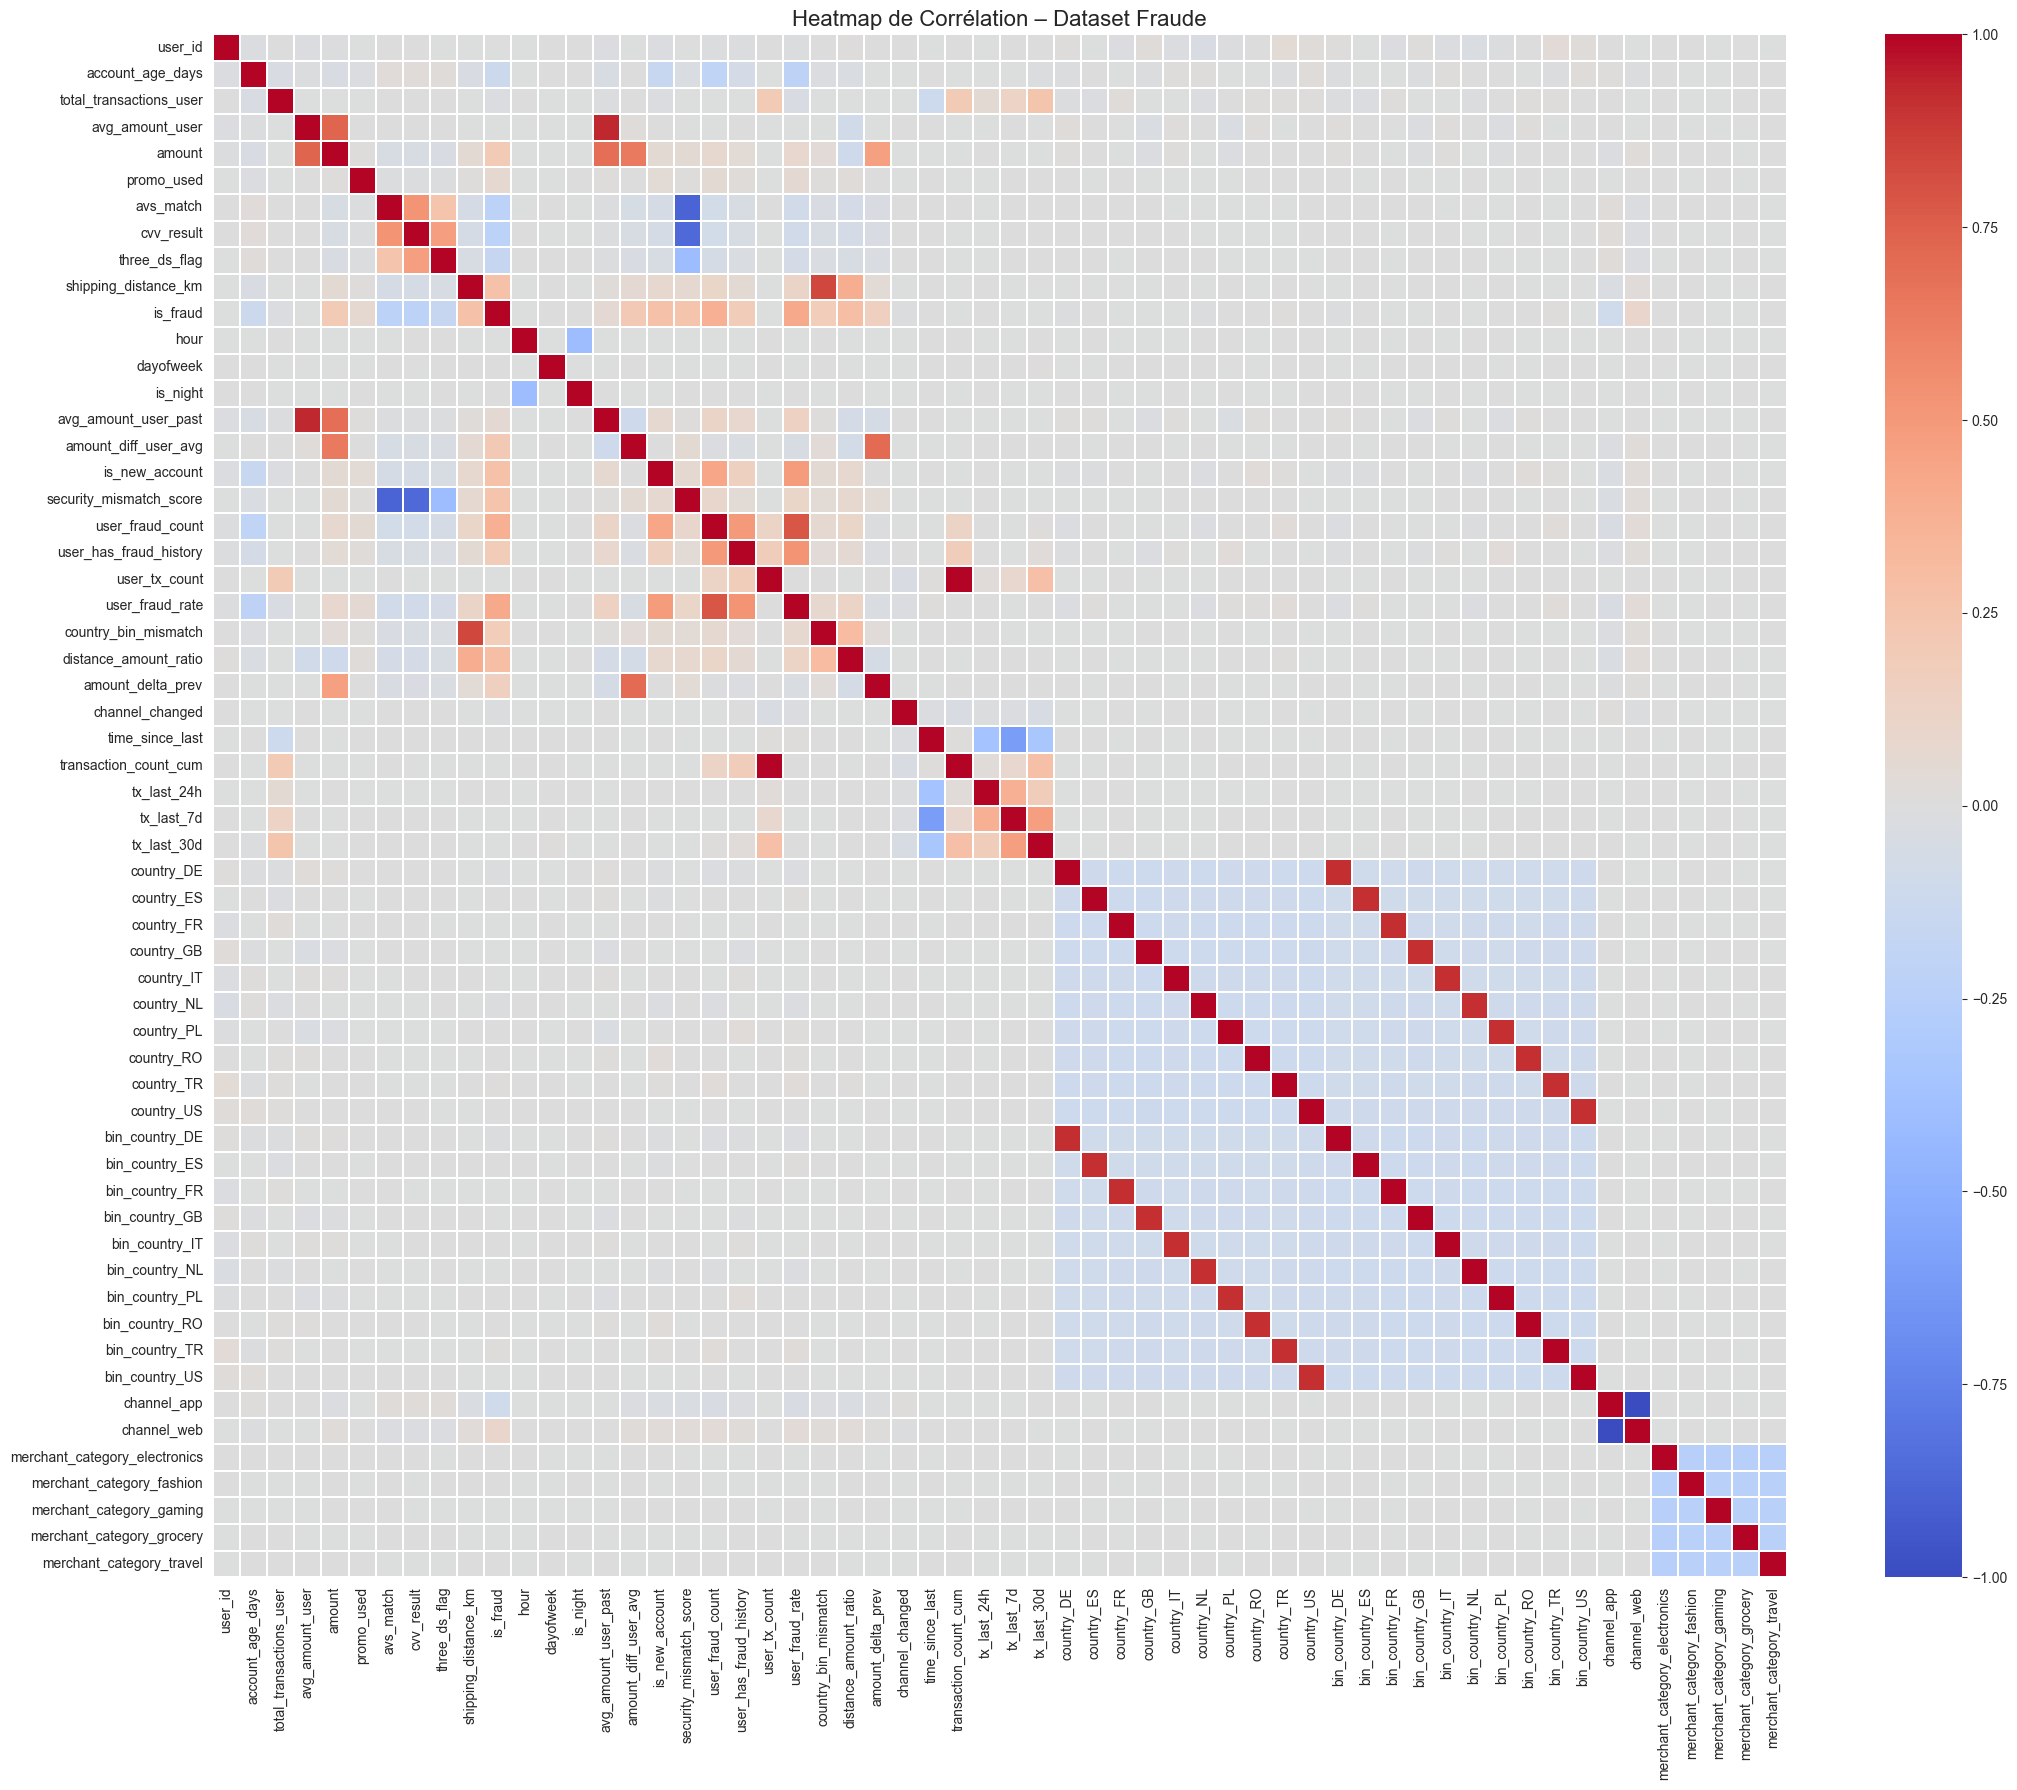

In [67]:
# 1. Conversion des booléens en int (sinon heatmap plante)
df_corr = df.copy()
bool_cols = df_corr.select_dtypes(include=['bool']).columns
df_corr[bool_cols] = df_corr[bool_cols].astype(int)

# 2. Calcul des corrélations
corr_matrix = df_corr.corr()

# 3. Heatmap
plt.figure(figsize=(22, 18))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=False,
    vmin=-1, vmax=1,
    linewidths=0.1
)

plt.title("Heatmap de Corrélation – Dataset Fraude", fontsize=16)
plt.tight_layout()
plt.show()

### Analyse de la matrice de corrélation

La heatmap montre une faible corrélation globale entre les variables, ce qui limite les risques de multicolinéarité et favorise la stabilité du modèle.
Les corrélations les plus visibles concernent des variables issues du même feature engineering (historique utilisateur, agrégats temporels, encodages pays), ce qui est attendu.
Aucune corrélation excessive avec la cible `is_fraud` n’apparaît, confirmant l’intérêt d’un modèle non linéaire pour capter des interactions complexes.


### Optimisation des hyperparamètres avec Optuna

In [68]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, recall_score
from sklearn.model_selection import train_test_split

 #Fonction objectif Optuna
def objective(trial):

    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 1500),
        "max_depth": trial.suggest_int("max_depth", 2, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "gamma": trial.suggest_float("gamma", 0, 10),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 5, 50),

        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "random_state": 42,
        "n_jobs": -1
    }

    model = XGBClassifier(**params)

    # Train
    model.fit(X_train, y_train)

    # Predictions
    preds = model.predict(X_test)

    # Score orienté fraude : Recall + F1
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    # On maximise : trade-off F1 + Recall
    return (0.6 * recall) + (0.4 * f1)

In [69]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=2)
# Test limité à 2 trials pour la présentation,
# l’optimisation complète a été réalisée sur 150 trials
# et les résultats sont détaillés dans le markdown ci-dessous.


[I 2025-12-19 13:36:50,582] A new study created in memory with name: no-name-0cc767c2-6151-401d-963b-8613c5f81e23
[I 2025-12-19 13:36:58,892] Trial 0 finished with value: 0.8116279938638025 and parameters: {'n_estimators': 1470, 'max_depth': 9, 'learning_rate': 0.2613835537500282, 'gamma': 8.466157273152673, 'min_child_weight': 10, 'subsample': 0.7000423131953927, 'colsample_bytree': 0.948295020405272, 'scale_pos_weight': 8.014294568224415}. Best is trial 0 with value: 0.8116279938638025.
[I 2025-12-19 13:37:09,916] Trial 1 finished with value: 0.7908803481276241 and parameters: {'n_estimators': 1327, 'max_depth': 4, 'learning_rate': 0.2701330303880215, 'gamma': 8.570256455294192, 'min_child_weight': 10, 'subsample': 0.6615273111830544, 'colsample_bytree': 0.7923446166077787, 'scale_pos_weight': 46.47541920045342}. Best is trial 0 with value: 0.8116279938638025.


In [70]:
print("Best Score:", study.best_value)
print("Best Params:", study.best_params)

Best Score: 0.8116279938638025
Best Params: {'n_estimators': 1470, 'max_depth': 9, 'learning_rate': 0.2613835537500282, 'gamma': 8.466157273152673, 'min_child_weight': 10, 'subsample': 0.7000423131953927, 'colsample_bytree': 0.948295020405272, 'scale_pos_weight': 8.014294568224415}


### Optimisation des hyperparamètres

Les hyperparamètres du modèle ont été optimisés à l’aide d’Optuna afin d’explorer efficacement l’espace de recherche et d’identifier les configurations les plus performantes.
Le modèle final ne correspond pas nécessairement au meilleur essai brut, mais à un ensemble de paramètres sélectionné parmi les meilleurs trials pour offrir un meilleur compromis entre performance, stabilité et généralisation.
Ce choix permet de limiter le sur-apprentissage tout en conservant des résultats solides et cohérents sur les jeux d’entraînement et de test.



In [71]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    recall_score,
    precision_score,
    f1_score,
    classification_report,
    confusion_matrix
)

# ===============================
# 1. Modèle XGBoost – Best Optuna Params
# ===============================

model = XGBClassifier(
    n_estimators=360,
    max_depth=3,
    learning_rate=0.08988925976027803,
    gamma=6.832453848633769,
    min_child_weight=16,
    subsample=0.9989920858950934,
    colsample_bytree=0.5418940975093512,
    scale_pos_weight=5.003569800495007,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

# ===============================
# 2. Entraînement
# ===============================
model.fit(X_train, y_train)

# ===============================
# 3. Prédictions (seuil par défaut 0.5)
# ===============================
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

# ===============================
# 4. Scores
# ===============================
print("===== TRAIN RESULTS =====")
print("Recall   :", recall_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("F1-score :", f1_score(y_train, y_train_pred))

print("\n===== TEST RESULTS =====")
print("Recall   :", recall_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("F1-score :", f1_score(y_test, y_test_pred))

# ===============================
# 5. Confusion Matrix
# ===============================
print("\n===== CONFUSION MATRIX =====")
print(confusion_matrix(y_test, y_test_pred))

print("\n===== CLASSIFICATION REPORT =====")
print(classification_report(y_test, y_test_pred))


===== TRAIN RESULTS =====
Recall   : 0.8293005671077505
Precision: 0.7950344327654948
F1-score : 0.8118060695780903

===== TEST RESULTS =====
Recall   : 0.8320726172465961
Precision: 0.7919366450683946
F1-score : 0.8115086683880487

===== CONFUSION MATRIX =====
[[58328   289]
 [  222  1100]]

===== CLASSIFICATION REPORT =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58617
           1       0.79      0.83      0.81      1322

    accuracy                           0.99     59939
   macro avg       0.89      0.91      0.90     59939
weighted avg       0.99      0.99      0.99     59939



Le modèle XGBoost montre des performances élevées et stables entre le jeu d’entraînement et le jeu de test, indiquant une bonne généralisation.
Sur le jeu de test, il détecte environ **83 % des fraudes**, ce qui répond à un objectif orienté **recall** dans un contexte de classes déséquilibrées.
La **precision à 79 %** traduit un nombre de faux positifs maîtrisé malgré une détection active des fraudes.
La matrice de confusion confirme que la majorité des transactions frauduleuses sont correctement identifiées, avec un volume limité de fraudes manquées.
Le **F1-score de 0.81** reflète un bon compromis global entre exigences métier et performance technique.


In [72]:
import joblib

joblib.dump(model, "models/xgboost_fraud_optuna.pkl")

['xgboost_fraud_optuna.pkl']

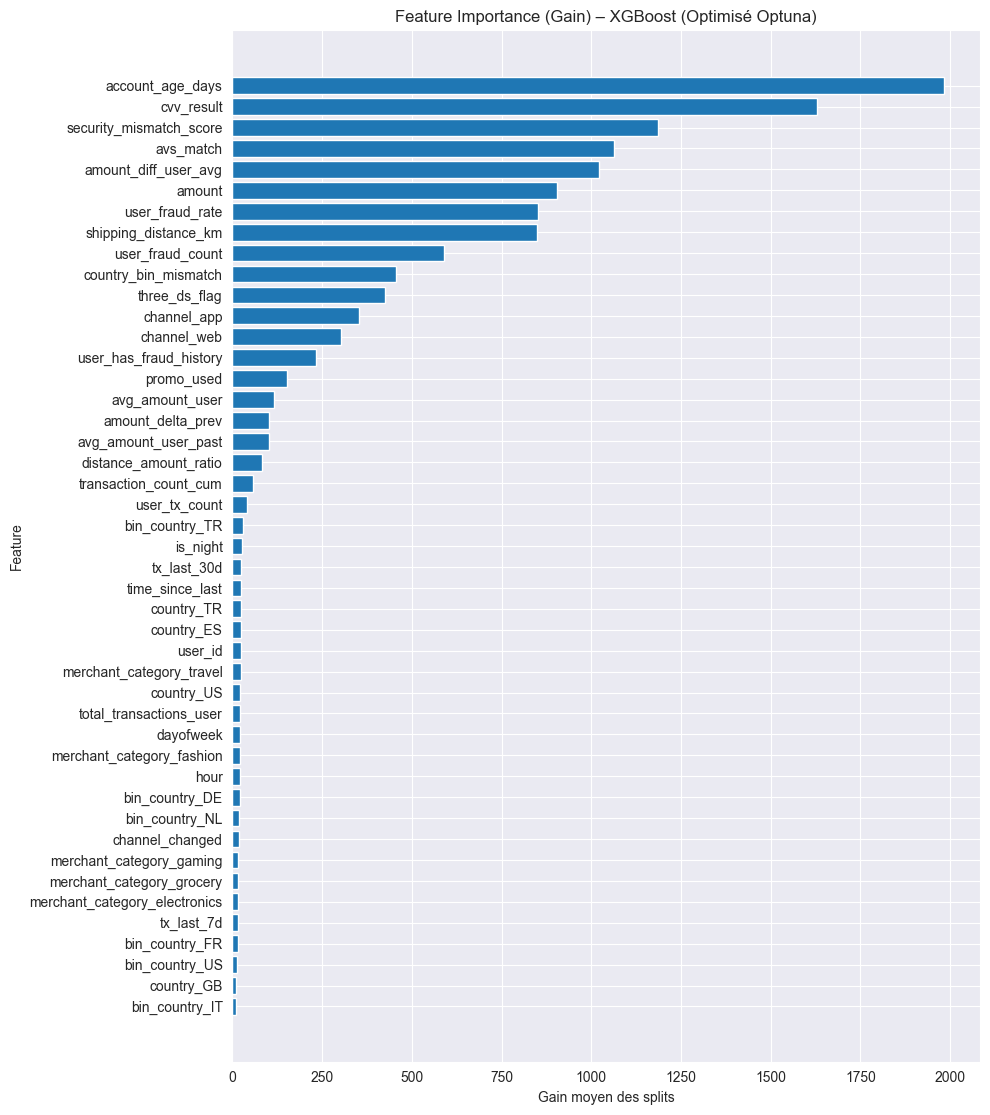

In [83]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt

# Récupération des importances XGBoost (GAIN)
booster = model.get_booster()
importance = booster.get_score(importance_type="gain")

# DataFrame
importance_df = (
    pd.DataFrame(
        importance.items(),
        columns=["feature", "importance"]
    )
    .sort_values("importance", ascending=False)
)

# Plot – toutes les features
plt.figure(figsize=(10, len(importance_df) * 0.25))
plt.barh(
    importance_df["feature"][::-1],
    importance_df["importance"][::-1]
)
plt.title("Feature Importance (Gain) – XGBoost (Optimisé Optuna)")
plt.xlabel("Gain moyen des splits")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Ce graphique présente l’importance des variables selon le **gain XGBoost**, c’est-à-dire
l’amélioration moyenne apportée par chaque feature lors des splits de l’arbre.
Les variables en tête (`account_age_days`, `cvv_result`, `security_mismatch_score`, `avs_match`)
sont celles qui permettent au modèle de **séparer le plus efficacement les transactions frauduleuses** des transactions légitimes.
Après optimisation Optuna, le modèle concentre la majorité du gain sur un **nombre réduit de signaux forts**,
principalement liés à l’ancienneté du compte, aux contrôles de sécurité et aux incohérences comportementales.
Les variables de contexte ou de volume apparaissent en bas du classement, indiquant qu’elles apportent
peu d’information supplémentaire une fois les signaux clés capturés.
Ce comportement confirme que l’optimisation Optuna a renforcé la capacité de XGBoost
à exploiter des interactions complexes tout en limitant le bruit, expliquant les gains de performance



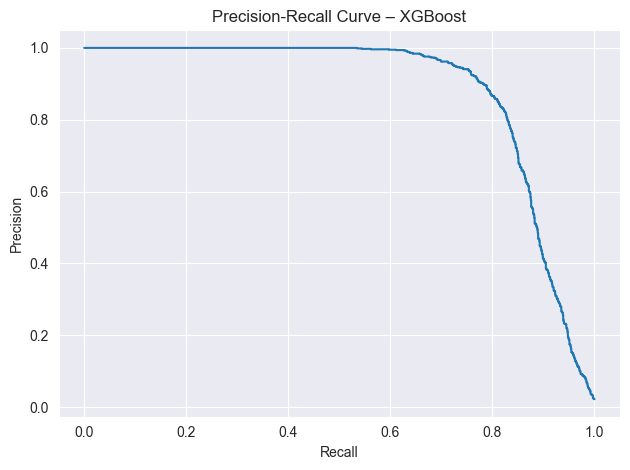

In [85]:
from sklearn.metrics import precision_recall_curve

y_proba = model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve – XGBoost")
plt.tight_layout()
plt.show()


Cette courbe Precision–Recall illustre le compromis entre **détection des fraudes (recall)** et **qualité des alertes (precision)** pour le modèle XGBoost.
La precision reste élevée sur une large plage de recall, ce qui montre que le modèle identifie efficacement les fraudes sans générer excessivement de faux positifs.
La dégradation progressive de la precision à fort recall traduit un comportement attendu lorsque le seuil est abaissé pour capter davantage de fraudes.
Ce graphique est particulièrement pertinent dans un contexte de **classe rare**, où la PR curve est plus informative que la courbe ROC.
Il permet de **choisir un seuil de décision métier** en fonction de l’équilibre souhaité entre risque de fraude manquée et coût des faux positifs.


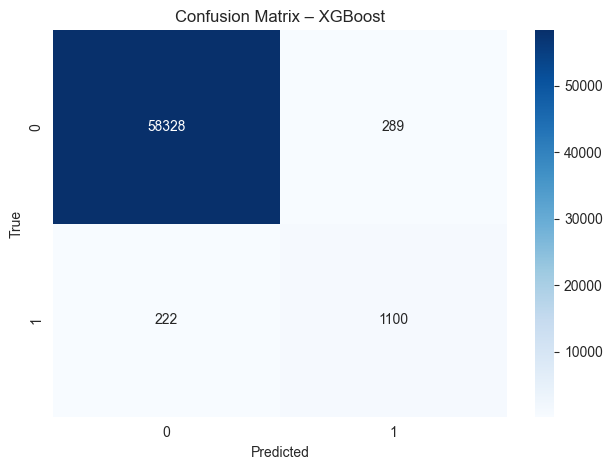

In [75]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – XGBoost")
plt.tight_layout()
plt.show()


Cette matrice de confusion montre que le modèle classe correctement la grande majorité des transactions non frauduleuses, avec un nombre très limité de faux positifs.
Sur la classe fraude, **1 100 transactions sont correctement détectées** contre **222 fraudes manquées**, ce qui correspond à un recall élevé.
Le nombre de faux positifs (289) reste contenu au regard du volume total de transactions, limitant l’impact opérationnel.
Ce comportement traduit un modèle orienté **détection active de la fraude** tout en conservant une bonne précision globale.
La matrice confirme un **équilibre cohérent entre exigences métier et performance technique**.


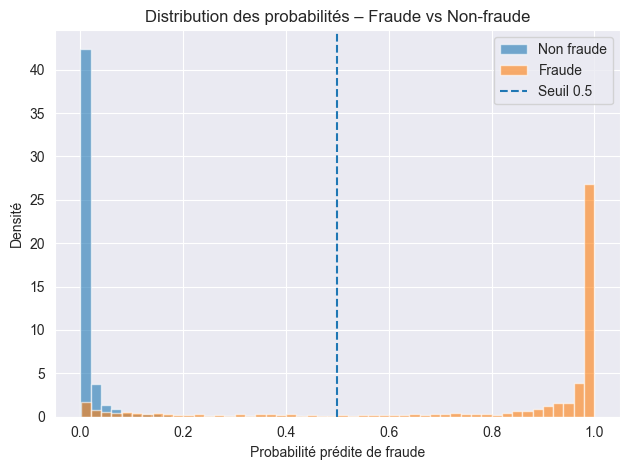

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Probabilités prédites
y_proba = model.predict_proba(X_test)[:, 1]

# Séparation par classe réelle
proba_non_fraud = y_proba[y_test == 0]
proba_fraud = y_proba[y_test == 1]

plt.figure()
plt.hist(proba_non_fraud, bins=50, alpha=0.6, label="Non fraude", density=True)
plt.hist(proba_fraud, bins=50, alpha=0.6, label="Fraude", density=True)

plt.axvline(0.5, linestyle="--", label="Seuil 0.5")
plt.xlabel("Probabilité prédite de fraude")
plt.ylabel("Densité")
plt.title("Distribution des probabilités – Fraude vs Non-fraude")
plt.legend()
plt.tight_layout()
plt.show()


Ce graphique montre la distribution des probabilités prédites pour les transactions frauduleuses et non frauduleuses.
Une bonne séparation entre les deux distributions indique que le modèle distingue efficacement les comportements normaux des fraudes.
Le chevauchement observé autour du seuil reflète les cas ambigus, inhérents aux données réelles.
Ce graphique permet de justifier le choix du seuil de décision en fonction du compromis souhaité entre fraudes manquées et faux positifs.
Il constitue un outil clé pour relier performance technique et décision métier.


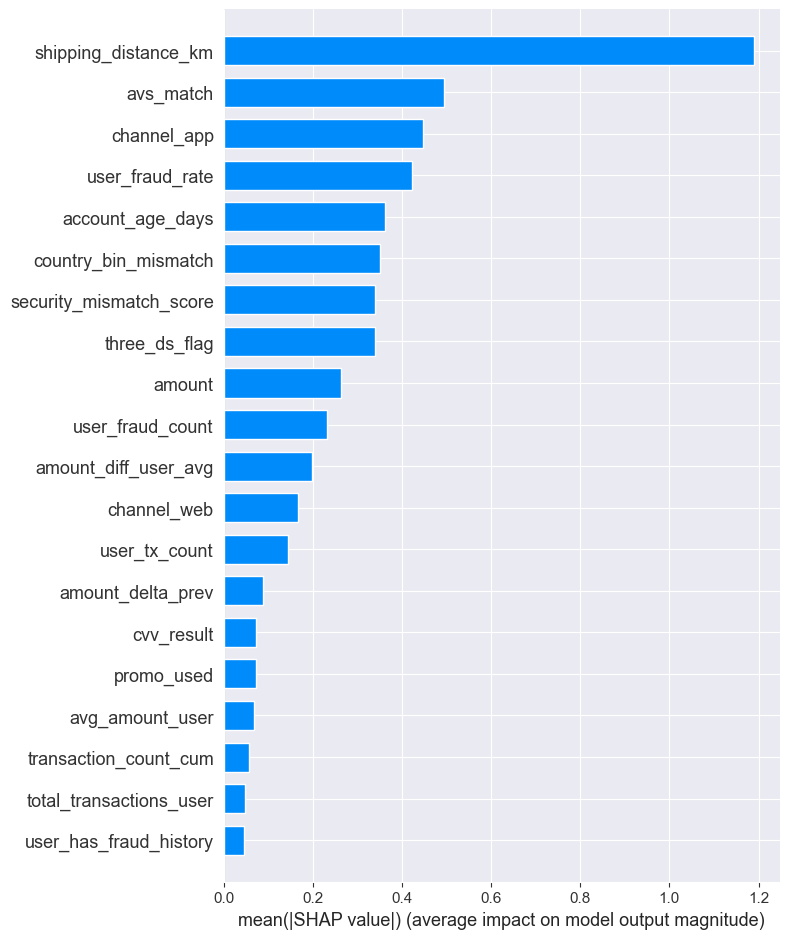

In [77]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")


Ce graphique SHAP global met en évidence les variables ayant le plus fort impact moyen sur les prédictions du modèle.
La distance de livraison (`shipping_distance_km`) ressort comme le facteur le plus discriminant, soulignant l’importance des incohérences géographiques dans la détection de fraude.
Les signaux de sécurité et de paiement (`avs_match`, `security_mismatch_score`, `three_ds_flag`) jouent également un rôle majeur dans la décision.
Les variables comportementales utilisateur (`user_fraud_rate`, `user_fraud_count`, `account_age_days`) confirment que l’historique est central dans l’identification des fraudes.
L’ensemble montre un modèle explicable, aligné avec la logique métier et reposant sur des signaux cohérents et interprétables.


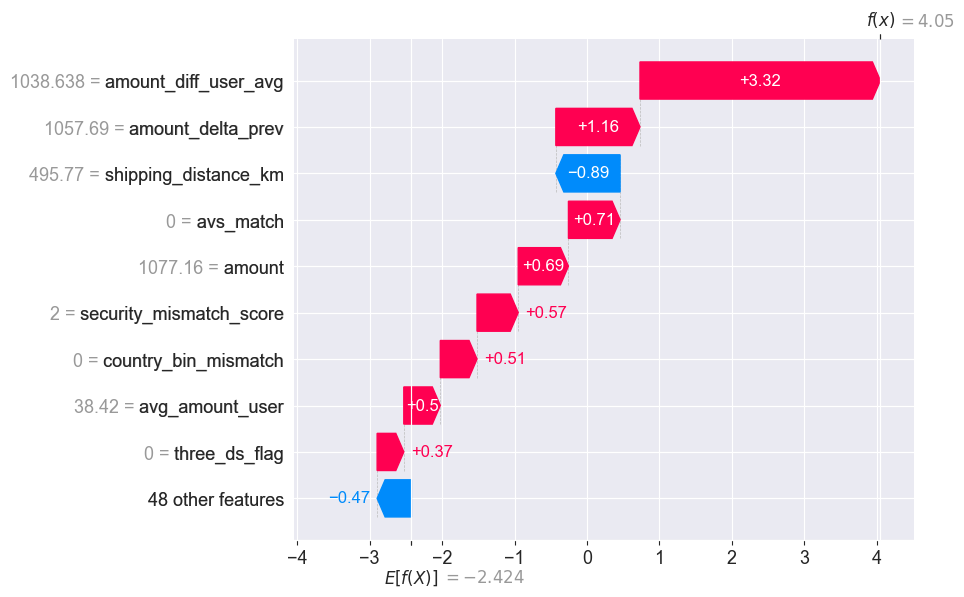

In [78]:
# Exemple : première transaction frauduleuse du test
idx = X_test[y_test == 1].index[0]

shap.plots.waterfall(
    shap.Explanation(
        values=shap_values[X_test.index.get_loc(idx)],
        base_values=explainer.expected_value,
        data=X_test.loc[idx],
        feature_names=X_test.columns
    )
)


Ce graphique SHAP local explique la prédiction du modèle pour une transaction spécifique identifiée comme frauduleuse.
Les variables liées aux montants (`amount_diff_user_avg`, `amount_delta_prev`, `amount`) contribuent fortement à augmenter le score de fraude.
La distance de livraison (`shipping_distance_km`) agit ici comme un facteur atténuant, réduisant légèrement la probabilité prédite.
Les signaux de sécurité et de cohérence (`avs_match`, `security_mismatch_score`, `country_bin_mismatch`) renforcent la décision finale.
Ce graphique permet de comprendre précisément **quels facteurs ont déclenché l’alerte**, rendant la prédiction explicable et justifiable métier.


### Choix final du modèle – XGBoost

Après comparaison des différents modèles testés, **XGBoost a été retenu comme modèle final** pour la détection de fraude.
L’optimisation par Optuna a permis d’obtenir le **meilleur compromis entre recall et precision**, limitant efficacement les faux positifs tout en détectant une large proportion de fraudes.
Les analyses d’importance des variables (gain XGBoost) et les visualisations SHAP montrent que le modèle s’appuie sur un **ensemble restreint de signaux fortement discriminants**, alignés avec la logique métier.
Les courbes Precision-Recall et la matrice de confusion confirment une **séparation nette entre fraudes et non-fraudes**, supérieure à celle observée avec les autres approches.
Ainsi, XGBoost s’est imposé comme la solution la plus performante, robuste et exploitable pour une mise en production du système de détection de fraude.


### Comparaison finale des modèles après optimisation

**XGBoost** présente les meilleurs résultats globaux avec un **F1-score stable (~0.81)** entre le train et le test, indiquant une excellente généralisation. Le modèle atteint un **bon équilibre entre recall (~0.83)** et **precision (~0.79)**, avec un nombre limité de faux positifs (289) et de faux négatifs (222), ce qui le rend **efficace et exploitable en contexte métier**.

Le **Random Forest** affiche un **recall élevé**, notamment en entraînement, mais au prix d’une **baisse significative de la precision** sur le jeu de test (0.65). La matrice de confusion montre davantage de faux positifs (613), ce qui dégrade le **F1-score (~0.74)**. Le modèle reste robuste mais **moins discriminant** que XGBoost sur les cas complexes de fraude.

La **régression logistique** détecte correctement une grande partie des fraudes (**recall ~0.89**), mais génère un **volume très important de faux positifs** (4 209), entraînant une **precision très faible (~0.22)** et un **F1-score insuffisant (~0.35)**. Ce comportement confirme les **limites d’un modèle linéaire** sur un problème de fraude fortement déséquilibré et non linéaire.

En conclusion, **XGBoost s’impose comme le meilleur compromis performance / généralisation / exploitabilité**, le Random Forest comme une alternative robuste mais moins précise, et la régression logistique comme une baseline interprétable mais inadaptée à une mise en production.
